## 원본데이터와 가상데이터간의 성능비교

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time
import pickle
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
from collections import defaultdict
from itertools import islice, combinations
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")
# import seaborn as sns
import matplotlib.pyplot as plt

# from ctgan import CTGANSynthesizer
# 폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'


In [2]:
#주피터 셀 전체화면보기
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# 주피터 한 셀에 입력된 수시과 함수의 결과를 모두출력(선택사용)
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
## 각 컬럼 width 최대로
pd.set_option('display.max_colwidth', -1)
## rows 500
pd.set_option('display.max_rows', 500)
## columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print('ready to run')
# 전체 시작시간 로깅
startTime = time.time()

ready to run


In [3]:
import os
import pickle
print(os.getcwd())

C:\Users\kcs\df_syn_generation_copy


In [4]:
os.chdir("C:/Users/kcs/df_syn_generation_copy")

In [5]:
# load and uncompress.
real=pd.read_csv('./result_org/df_org.csv', encoding='utf-8-sig')

In [6]:
# load and uncompress.
fake=pd.read_csv('./result_syn/df_syn.csv', encoding='utf-8-sig')

In [7]:
real.head()

,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,수입자,해외거래처부호,특송업체부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,2020-01-01,30,B,11,21,11,10,NN47CLJ,C28EH18,MLYD5UT,NaN,303390000,US,US,0.0,FUS5,B,213849.670,327092735,0,0
1,2020-01-01,30,B,11,21,43,10,NMUDCWY,6BSH9HY,SWXIDCI,NaN,4202999000,SG,VN,8.0,A,Y,39.278,426880,0,0
2,2020-01-01,30,B,11,21,11,10,HUIUK4E,C28EH18,VCX09HV,NaN,303390000,US,US,0.0,FUS5,B,14789.900,24464010,1,1
3,2020-01-01,30,B,11,21,11,10,NN47CLJ,C28EH18,MLYD5UT,NaN,303390000,US,US,0.0,FUS5,B,213849.670,327092735,0,0
4,2020-01-01,40,B,100,21,11,40,F2SS4WH,ITNWSCA,HCK5FYC,NaN,4907009000,HK,US,0.0,A,S,400.000,15693464339,0,0


In [8]:
fake.head()

,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,수입자,해외거래처부호,특송업체부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,2020-01-01,32,B,88,12,11,10,CDO1QN6,QD86XU7,8QOEWI1,NaN,9503003700,CN,CN,8.0,A,G,2.3,18.17,1,1
1,2020-01-01,29,B,12,21,11,40,K3E28IQ,MEDCNNU,DSDYKO2,NaN,3926909000,CN,CN,6.5,C,B,2.0,1.20,0,0
2,2020-01-01,40,B,10,21,40,39,00RURK1,92X3AXX,M7J7I9L,W6UCD9,7318190000,CN,CN,8.0,A,B,2.0,190.80,0,0
3,2020-01-01,14,B,97,21,10,10,1XCM1XF,XE08QFH,3VEFA3W,NaN,3926909000,CN,CN,6.5,C,B,40.0,24.00,0,0
4,2020-01-01,42,B,11,21,11,39,6V8QPPW,LD8GM65,NaN,NaN,7102390000,CN,HK,5.0,A,G,0.0,0.00,0,0


### 1. 통계적 성능비교

In [9]:
real=real.astype({'신고일자':'datetime64', '신고세관부호':'object', '수입거래구분코드':'object', '수입종류코드':'object', '징수형태코드':'object', '운송수단유형코드':'object', 'HS10단위부호':'object', '우범여부':'object', '핵심적발':'object','과세가격원화금액':'float64'})

In [10]:
fake=fake.astype({'신고일자':'datetime64', '신고세관부호':'object', '수입거래구분코드':'object', '수입종류코드':'object', '징수형태코드':'object', '운송수단유형코드':'object', 'HS10단위부호':'object', '우범여부':'object', '핵심적발':'object'})

In [11]:
from sdv.metrics.tabular import CSTest, KSTest

In [12]:
# Chi-Squared test
CSTest.compute(real, fake)

0.7057426790267526

In [13]:
# Kolmogorov-Smirnov test
KSTest.compute(real, fake)

0.7834382716049383

In [14]:
from sdv.evaluation import evaluate

In [15]:
evaluate(fake, real, metrics=['CSTest','KSTest'], aggregate= False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,CSTest,Chi-Squared,0.705743,0.705743,0.0,1.0,MAXIMIZE,None
1,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.783438,0.783438,0.0,1.0,MAXIMIZE,None


###  2. 유사도 성능비교

In [16]:
%matplotlib inline

In [17]:
from table_evaluator import load_data, TableEvaluator

In [18]:
real.dtypes

신고일자         datetime64[ns]
신고세관부호       object        
수입신고구분코드     object        
수입거래구분코드     object        
수입종류코드       object        
징수형태코드       object        
운송수단유형코드     object        
신고인부호        object        
수입자          object        
해외거래처부호      object        
특송업체부호       object        
HS10단위부호     object        
적출국가코드       object        
원산지국가코드      object        
관세율          float64       
관세율구분코드      object        
원산지표시유무코드    object        
신고중량(KG)     float64       
과세가격원화금액     float64       
우범여부         object        
핵심적발         object        
dtype: object

In [19]:
fake.dtypes

신고일자         datetime64[ns]
신고세관부호       object        
수입신고구분코드     object        
수입거래구분코드     object        
수입종류코드       object        
징수형태코드       object        
운송수단유형코드     object        
신고인부호        object        
수입자          object        
해외거래처부호      object        
특송업체부호       object        
HS10단위부호     object        
적출국가코드       object        
원산지국가코드      object        
관세율          float64       
관세율구분코드      object        
원산지표시유무코드    object        
신고중량(KG)     float64       
과세가격원화금액     float64       
우범여부         object        
핵심적발         object        
dtype: object

In [20]:
# real, fake = load_data('data/real_test_sample.csv', 'data/fake_test_sample.csv')
# real.head()
# fake.head()

In [21]:
categorical_features =['신고세관부호', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '운송수단유형코드', '신고인부호', '수입자', '해외거래처부호', '특송업체부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드', '원산지표시유무코드','우범여부','핵심적발']

In [22]:
real.columns

Index(['신고일자', '신고세관부호', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '운송수단유형코드', '신고인부호', '수입자', '해외거래처부호', '특송업체부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율', '관세율구분코드', '원산지표시유무코드', '신고중량(KG)', '과세가격원화금액', '우범여부', '핵심적발'], dtype='object')

In [23]:
print(real.shape, fake.shape)

(54000, 21) (54000, 21)


In [24]:
table_evaluator = TableEvaluator(real,fake)

In [25]:
# table_evaluator = TableEvaluator(real,fake, cat_cols=categorical_features)

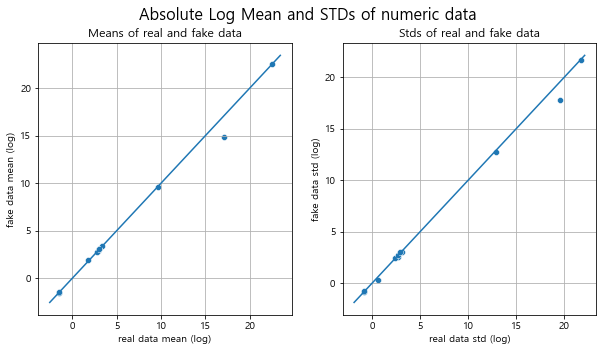

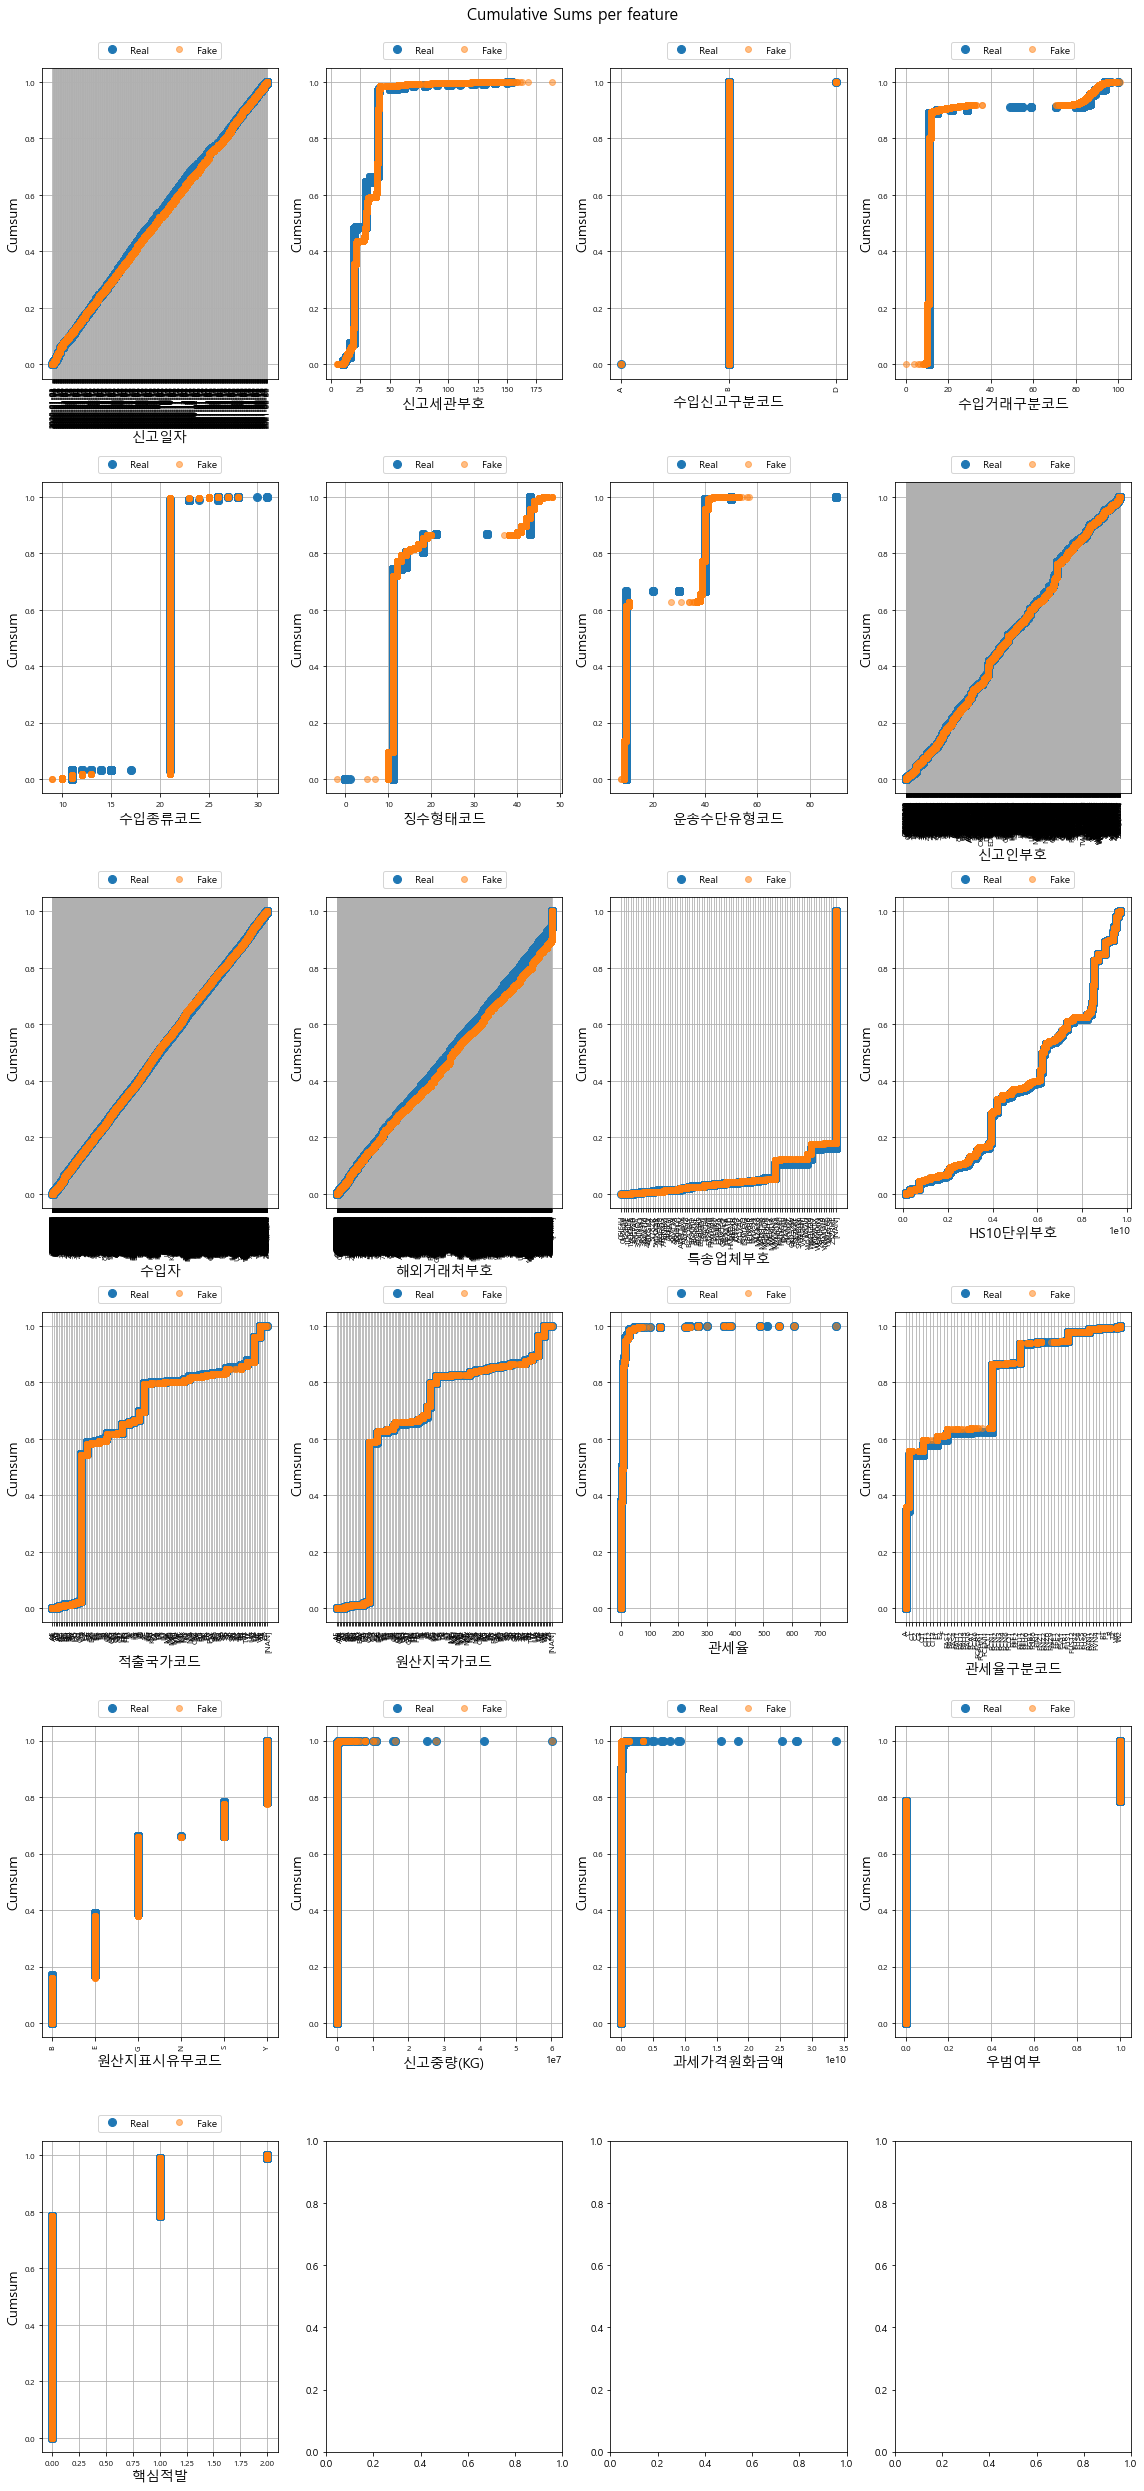

ValueError: cannot reindex on an axis with duplicate labels

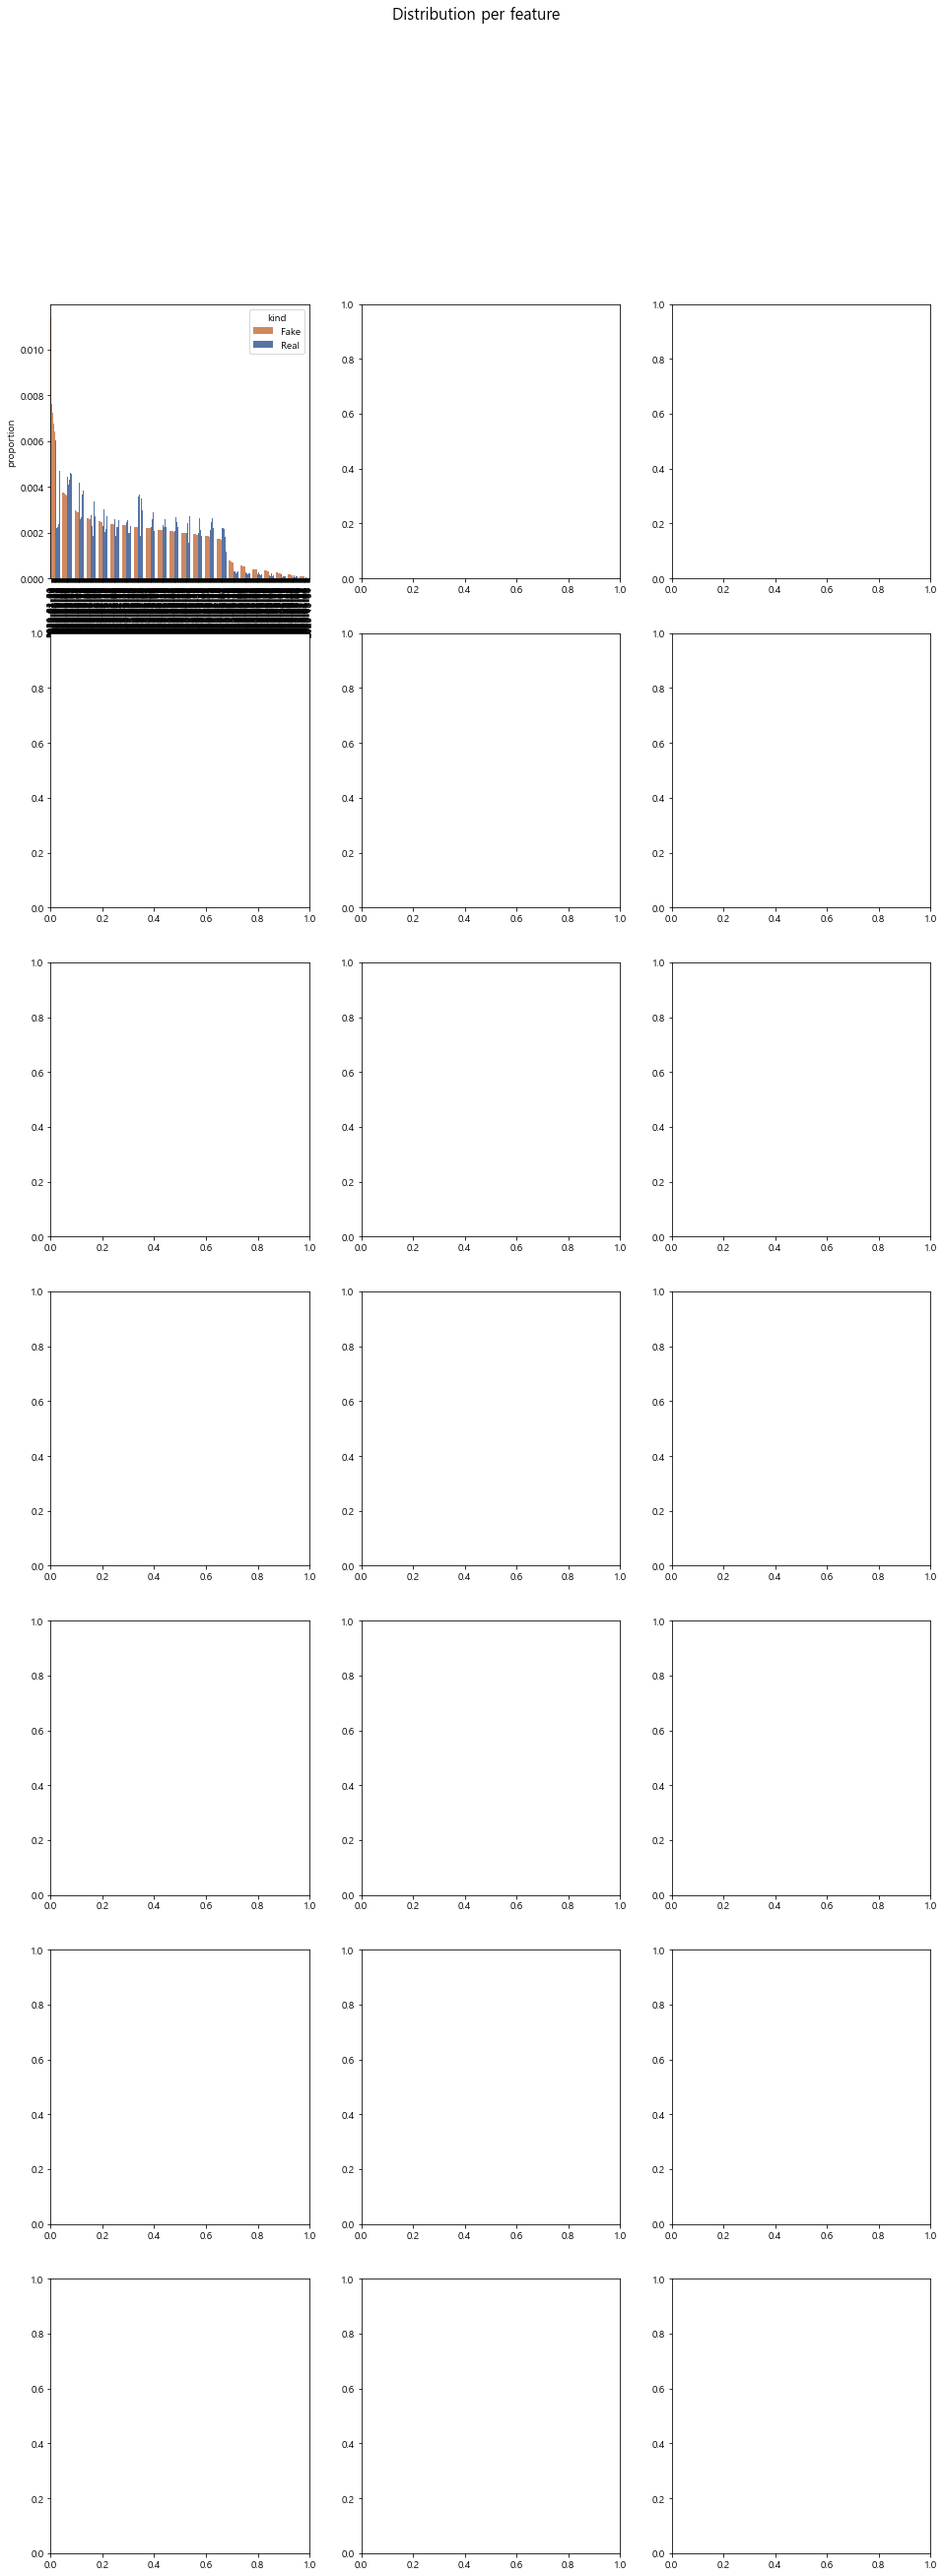

In [26]:
table_evaluator.visual_evaluation()